In [56]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
from llm import *
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# load_dotenv()

# GPT_API_KEY = os.getenv("GPT_API_KEY")

# llm = GPTModel(GPT_API_KEY, "gpt-3.5-turbo-0125", 0.7)

In [50]:
cec2017_tasks = get_10_tasks()

In [54]:
num_indis_per_task = 100
indi_len = 50
mutation = PolynomialMutation(5, 0.02)
crossover = SBXCrossover(mutation, eta=2)
# crossover = BLXCrossover()
rmp = AdaptiveRMPMatrix(rmp_pop_size=5, num_gen=5, pc=0.8, pm=0.1)

np.random.seed(0)
amfea = AMFEA(num_indis_per_task, indi_len, cec2017_tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 125473.96699307997
Mean Fitness: 166392.121167927

Task 1:
Best Fitness: 319204.0909081603
Mean Fitness: 503987.30720511527

Task 2:
Best Fitness: 346653.31463481847
Mean Fitness: 486737.256905658

Task 3:
Best Fitness: 41.0604113392313
Mean Fitness: 49.714217403069476

Task 4:
Best Fitness: 4058761661.357497
Mean Fitness: 6371677088.876898

Task 5:
Best Fitness: 21.482750101043788
Mean Fitness: 21.715487176250566

Task 6:
Best Fitness: 86.24595513767974
Mean Fitness: 99.8559653446189

Task 7:
Best Fitness: 18243.689210172182
Mean Fitness: 21153.768897608556

Task 8:
Best Fitness: 74.8950497645563
Mean Fitness: 122.64795239117853

Task 9:
Best Fitness: 88658.75615256254
Mean Fitness: 124389.07711105635



In [55]:
bfs, mfs = amfea.fit(num_gen=1000, monitor=True, monitor_rate=100, llm_rate=100)

Creating strategy
Creating strategy
Creating strategy
Creating strategy
Creating strategy
Evaluating strategy
Strategy: 
Calculate the Euclidean distance between the mean vectors of each pair of tasks. Adjust RMP values inversely proportional to the distance, assigning higher probabilities to more similar tasks.
Compare the variance of fitness values across tasks. Increase RMP values between tasks with similar fitness variances to promote more frequent mating among individuals from these tasks.
Analyze the ratio of population variances to fitness variances for each task. Adjust RMP values based on this ratio, giving higher probabilities to tasks where individuals are more spread out relative to their fitness levels.
Consider the correlation between mean vectors and fitness values for each task. Increase RMP values for task pairs with high positive correlations to encourage mating between individuals with both similar positions in the search space and fitness levels.
Creating code...
RM

<string>:12: RuntimeWarning: invalid value encountered in scalar divide
<string>:13: RuntimeWarning: invalid value encountered in scalar divide


RMP function: import numpy as np

def get_rmp_matrix(task_count, pop_mean, pop_variance, fit_mean, fit_var):
    def calculate_distance_matrix(matrix):
        return np.sqrt(np.sum((matrix[:, np.newaxis] - matrix) ** 2, axis=2))

    def calculate_correlation_matrix(matrix1, matrix2):
        centered_matrix1 = matrix1 - np.mean(matrix1)
        centered_matrix2 = matrix2 - np.mean(matrix2)
        return np.sum(centered_matrix1 * centered_matrix2) / (np.sqrt(np.sum(centered_matrix1 ** 2)) * np.sqrt(np.sum(centered_matrix2 ** 2))

    distance_matrix = calculate_distance_matrix(pop_mean)
    cluster_membership = np.argmin(distance_matrix, axis=1)

    fitness_ratio = fit_var / fit_mean

    correlation_matrix = np.zeros((task_count, task_count))
    for i in range(task_count):
        for j in range(task_count):
            correlation_matrix[i, j] = calculate_correlation_matrix(pop_mean[i], pop_variance[j])

    comprehensive_index = pop_mean + pop_variance + fit_mean + fit_var
    s

<string>:14: RuntimeWarning: invalid value encountered in scalar divide
<string>:15: RuntimeWarning: invalid value encountered in scalar divide


Evaluating strategy
Strategy: 
Calculate the cosine similarity between the mean vectors of each task and adjust RMP values inversely proportional to the similarity. Tasks with more similar mean vectors should have higher RMP values.
Analyze the spread of individuals within each task by computing the coefficient of variation (standard deviation divided by mean) for each task. Adjust RMP values such that tasks with higher coefficient of variation have lower probabilities of mating with other tasks.
Consider the relationship between fitness mean and variance for each task by calculating the coefficient of determination (R-squared value) between the two. Adjust RMP values based on the R-squared value, favoring mating within tasks with higher explanatory power of fitness variance by mean.
Assess the skewness of fitness distribution within each task and adjust RMP values based on the skewness coefficient. Tasks with more skewed fitness distributions should have lower RMP values to encourage 

<string>:6: RuntimeWarning: invalid value encountered in sqrt


Evaluating strategy
Strategy: 
Cluster tasks based on the Euclidean distance between mean vectors and adjust RMP values inversely based on cluster membership. Tasks in the same cluster should have higher mating probabilities. Additionally, consider the variance of fitness within each cluster and further adjust RMP values to favor tasks with higher diversity.
Analyze the ratio of fitness variance to mean for each task and adjust RMP values based on the deviation from the average ratio. Tasks with lower fitness variance but higher fitness mean should be given higher mating probabilities to promote exploitation of promising solutions.
Calculate the correlation between fitness mean and variance for each task and adjust RMP values based on the correlation coefficient. Tasks with a negative correlation should have higher mating probabilities to encourage exploration in areas where mean and variance do not align.
Consider the joint analysis of population mean, variance, fitness mean, and fitn

<string>:11: RuntimeWarning: invalid value encountered in sqrt


Evaluating strategy
Strategy: 
Prioritize promoting diversity by setting RMP values higher for task pairs with larger Mahalanobis distances between mean vectors.
Encourage individuality by setting RMP values higher for task pairs with higher positive correlation between population mean and fitness variance.
Stimulate exploration by setting RMP values higher for task pairs with lower covariance within clusters.
Focus on uniqueness by setting RMP values higher for task pairs with larger Euclidean distances between mean vectors.
Creating code...
RMP function: import numpy as np

def get_rmp_matrix(task_count, pop_mean, pop_variance, fit_mean, fit_var):
    RMP = np.zeros((task_count, task_count))
    for i in range(task_count):
        for j in range(i, task_count):
            if i == j:
                RMP[i][j] = 1.0
            else:
                mahalanobis_distance = np.linalg.norm(pop_mean[i] - pop_mean[j]) / np.sqrt(np.sum(pop_variance[i] + pop_variance[j]))
                cor

<string>:8: RuntimeWarning: invalid value encountered in scalar divide
<string>:11: RuntimeWarning: invalid value encountered in scalar divide


Evaluating strategy
Strategy: 
Cluster tasks based on the cosine dissimilarity between mean vectors and adjust RMP values inversely based on cluster membership. Tasks in the same cluster should have higher mating probabilities.
Analyze the ratio of fitness variance to mean for each task and adjust RMP values based on the deviation from the average ratio. Tasks with higher fitness variance relative to mean should have higher mating probabilities to promote exploration.
Calculate the Euclidean distance between fitness mean vectors and adjust RMP values inversely based on the distance. Tasks located closer together in fitness mean space should have higher mating probabilities to encourage exploitation.
Consider the joint analysis of population mean, variance, fitness mean, and fitness variance to create a comprehensive index for each task. Adjust RMP values based on this index to balance exploration and exploitation across tasks. Introduce a penalty for tasks with high mean but low varian

<string>:11: RuntimeWarning: invalid value encountered in sqrt


Evaluating strategy
Strategy: 
Calculate the Spearman correlation coefficient between the fitness mean vectors and adjust RMP values based on the rank correlation. Tasks with high rank correlation should have higher RMP values to promote exploitation while considering non-linear relationships.
Cluster tasks based on the Mahalanobis distance between the variance vectors and adjust RMP values inversely based on cluster membership. Tasks in the same cluster with similar Mahalanobis distance characteristics should have higher mating probabilities.
Analyze the ratio of fitness variance to population variance for each task and adjust RMP values based on the deviation from the task-specific average ratio. Tasks with significantly different ratios should have higher mating probabilities to encourage exploration and diversity.
Calculate the Jensen-Shannon divergence between the mean vectors and adjust RMP values inversely based on the divergence while considering the probability distributions. 

<string>:12: RuntimeWarning: divide by zero encountered in scalar divide


RMP function: import numpy as np

def get_rmp_matrix(task_count, pop_mean, pop_variance, fit_mean, fit_var):
    rmp_matrix = np.zeros((task_count, task_count))
    
    for i in range(task_count):
        for j in range(i, task_count):
            if i == j:
                rmp_matrix[i][j] = 1.0
            else:
                mean_similarity = np.dot(pop_mean[i], pop_mean[j]) / (np.linalg.norm(pop_mean[i]) * np.linalg.norm(pop_mean[j]))
                variance_ratio = fit_var[j] / np.mean(fit_var)
                correlation = np.corrcoef(fit_mean, fit_var)[0, 1]
                quality = fit_mean[j] / np.mean(fit_mean) * (1 - fit_var[j] / np.mean(fit_var))
                
                rmp_matrix[i][j] = mean_similarity * variance_ratio * correlation * quality
                rmp_matrix[j][i] = rmp_matrix[i][j]
                
                rmp_matrix[i][j] = max(0, min(1, rmp_matrix[i][j]))
                rmp_matrix[j][i] = rmp_matrix[i][j]
    
    return rmp_matrix
[[1

<string>:12: RuntimeWarning: invalid value encountered in scalar divide


Performance: -97393015.6077881
Crossover...
Evaluating strategy
Strategy: 
Cluster tasks based on the cosine similarity between their mean vectors and adjust RMP values inversely proportional to the similarity. Tasks with more similar mean vectors should have lower mating probabilities to promote exploration of diverse solutions.
Calculate the Mahalanobis distance between the variance vectors of each task and adjust RMP values directly proportional to the distance. Tasks with more dissimilar variance should have higher RMP values to encourage exploitation in stable regions of the search space.
Analyze the Spearman correlation coefficient between fitness mean and variance for each task and adjust RMP values inversely based on the correlation. Tasks with a positive correlation should have higher mating probabilities to exploit concentrated and high-quality regions.
Use the Kullback-Leibler divergence between the fitness distributions of tasks to quantify the difference and adjust RMP val

<string>:19: RuntimeWarning: invalid value encountered in scalar divide


RMP function: import numpy as np

def get_rmp_matrix(task_count, pop_mean, pop_variance, fit_mean, fit_var):
    def mahalanobis_distance(x, y, cov):
        diff = x - y
        return np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov)), diff.T))

    def correlation_coefficient(x, y):
        return np.corrcoef(x, y)[0, 1]

    rmp_matrix = np.zeros((task_count, task_count))
    for i in range(task_count):
        for j in range(i, task_count):
            euclidean_dist = np.linalg.norm(pop_mean[i] - pop_mean[j])
            mahalanobis_dist = mahalanobis_distance(pop_mean[i], pop_mean[j], np.diag(np.mean(pop_variance, axis=0)))
            mean_var_ratio_i = fit_var[i] / fit_mean[i]
            mean_var_ratio_j = fit_var[j] / fit_mean[j]
            corr_coeff = correlation_coefficient(fit_mean, fit_var)

            rmp_ij = 1 / (1 + euclidean_dist) * (1 / (1 + mahalanobis_dist)) * (1 - mean_var_ratio_i - mean_var_ratio_j) * corr_coeff
            rmp_matrix[i][j] = rmp_ij
           

c:\Users\madmo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


Performance: -140070337.11936954
Crossover...
Evaluating strategy
Strategy: 
Cluster tasks based on the Mahalanobis distance between mean vectors and adjust RMP values inversely proportional to the distance within each cluster. Tasks in closer clusters should have higher mating probabilities.
Analyze the ratio of fitness variance to mean for each task and adjust RMP values based on the deviation from the average. Tasks with lower variance-to-mean ratios should have higher mating probabilities.
Calculate the Pearson correlation coefficient between fitness mean and variance values for each task pair and adjust RMP values directly proportional to the correlation strength. Tasks with higher positive correlation should have higher mating probabilities.
Utilize the Euclidean distance between mean vectors of tasks to adjust RMP values inversely proportional to the distance. Tasks with more similar distributions based on Euclidean distance should have higher mating probabilities.
Creating code

<string>:16: RuntimeWarning: invalid value encountered in scalar divide
<string>:8: RuntimeWarning: invalid value encountered in log


Evaluating strategy
Strategy: 
Cluster tasks based on the variance between mean vectors and adjust RMP values directly proportional to the similarity. Tasks with more similar mean vectors should have higher mating probabilities.
Calculate the absolute entropy between fitness distributions of task pairs and adjust RMP values directly proportional to the entropy. Tasks with lower entropy should have higher mating probabilities.
Analyze the kurtosis of fitness values within each task and adjust RMP values based on the kurtosis. Tasks with less skewed fitness distributions should have lower mating probabilities.
Utilize the Jensen-Shannon Divergence between probability distributions of tasks' variance vectors and adjust RMP values directly proportional to the divergence. Tasks with more similar variance distributions should have higher mating probabilities.
Creating code...
RMP function: import numpy as np

def get_rmp_matrix(task_count, pop_mean, pop_variance, fit_mean, fit_var):
    def 

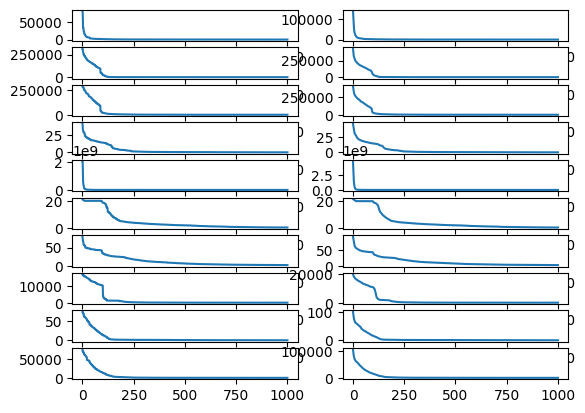

In [59]:
num_tasks = len(cec2017_tasks)
fig, axes = plt.subplots(num_tasks, 2)

for i in range(num_tasks):
    axes[i][0].plot(bfs[i])
    axes[i][1].plot(mfs[i])